# Damage sensor optimization using FNO model and Genetic Algorithm


In [1]:
# load packages
from pathlib import Path
from neuralop.models import FNO
from nopkit.data import load_damage_sensor_dataset
from nopkit.opt import GeneticAlgorithm, plot_fitness_curve, plot_best_layouts

device = 'cpu'

In [2]:
# load data
data_dir = Path("../data/damage_sensor")

train_loader, test_loaders, data_processor = load_damage_sensor_dataset(
    ramps_path=data_dir / "ramps_n500_res32.pt",
    damage_path=data_dir / "damage_n500_t175_res32.pt",
    defgrad_path=data_dir / "defgrad_n500_t175_res32.pt",
    elec_path=data_dir / "elec_n500_t175_res32.pt",
    masks_path=data_dir / "masks5_uniform.pt", # this is only used to load data
    n_train=450, # 450 out of 500
    batch_size=5,
    test_batch_sizes=[10],
    test_resolutions=[32],
    encode_input=True,
    encode_output=True,
)
test_db = test_loaders[32].dataset

Loaded RAMPs      -> ..\data\damage_sensor\ramps_n500_res32.pt,	(torch.Size([500, 32, 32]))
Loaded damage     -> ..\data\damage_sensor\damage_n500_t175_res32.pt,	(torch.Size([500, 32, 32, 175]))
Loaded defgrad    -> ..\data\damage_sensor\defgrad_n500_t175_res32.pt,	(torch.Size([500, 32, 32, 175]))
Loaded elec field -> ..\data\damage_sensor\elec_n500_t175_res32.pt,	(torch.Size([500, 32, 32, 175]))
Loaded masks      -> ..\data\damage_sensor\masks5_uniform.pt,	(torch.Size([5, 32, 32]))
Loading total samples: 500, total masks: 5
Loading train db: 450 samples, test db: 50 samples
Train input shape: torch.Size([450, 3, 32, 32, 175]), Train output shape: torch.Size([450, 3, 32, 32, 175])
Test input shape: torch.Size([50, 3, 32, 32, 175]), Test output shape: torch.Size([50, 3, 32, 32, 175])


In [3]:
# load model
model = FNO.from_checkpoint("../damage_sensor/model", save_name="fno3d_masks5_uniform")

In [ ]:
# setup and run GA
save_dir = Path("./history/")
save_dir.mkdir(exist_ok=True, parents=True)

print("Setting up GA...")
ga = GeneticAlgorithm(
    test_db=test_db,
    model=model,
    data_processor=data_processor,
    device=device,
    num_sensors_range=(5, 17),
    grid_size_x=32,
    grid_size_y=32,
    lambda_factor=0.05,
    pop_size=4,          # small population for quick test
    gen_size=10,           # only a few generations for testing
    cxpb=0.4,
    mutpb=0.8,
)

print("Running GA...")
ga.run_ga()

Setting up GA...
Running GA...
Initial evaluation...
gen	nevals	min        	avg        
0  	5     	1.27545e+09	1.37499e+09

Generation 1 start...
  Evaluating 3 offspring...
1  	3     	1.27545e+09	1.34041e+09

Generation 2 start...
  Evaluating 4 offspring...
2  	4     	1.27545e+09	1.27545e+09

Generation 3 start...
  Evaluating 5 offspring...
3  	5     	1.27545e+09	1.27545e+09

Generation 4 start...
  Evaluating 2 offspring...
4  	2     	1.27545e+09	1.27545e+09

Generation 5 start...
  Evaluating 3 offspring...
5  	3     	1.27545e+09	1.27545e+09

=== GA Finished ===
Best Sensor Layout: [(1, 31), (31, 16), (11, 31), (28, 31), (7, 31), (15, 31)]


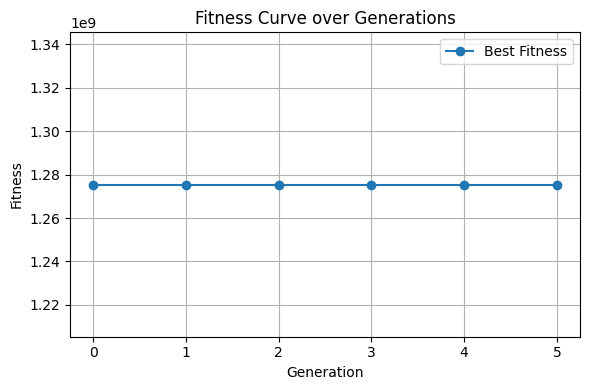

In [2]:
# plot fitness curve
plot_fitness_curve('./history')

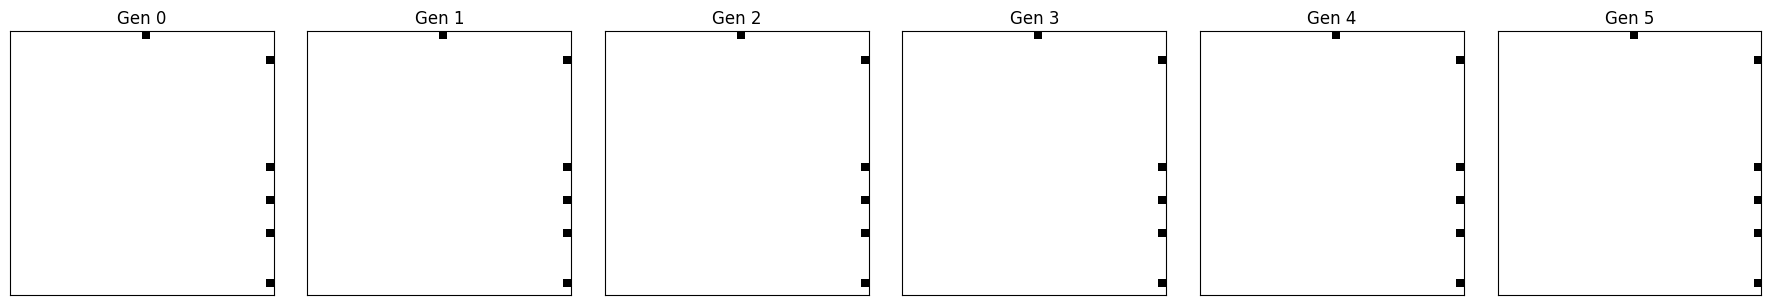

In [3]:
# plot best layouts
plot_best_layouts('./history', generations=[0, 1, 2, 3, 4,5])